##Q1


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
Q = np.matrix([[5,2],[2,3]])
b = np.matrix([[3],[-1]])
c = 5 

In [15]:
#Prepare for the 3D plot of the cost function 
def f(x,Q,b,c):
  return float(1/2*x.T*Q*x - b.T*x + c)

def paraboloid(Q,b,c):
  fig1 = plt.figure()
  qf = fig1.gca(projection='3d')

  size = 100
  x1 = np.linspace(-5,5,size)
  x2 = np.linspace(-5,5,size)

  x1,x2 = np.meshgrid(x1,x2)
  zs = np.zeros((size,size))
  for i in range(size):
    for j in range(size):
      x = np.matrix([[x1[i,j]],[x2[i,j]]])
      zs[i,j] = f(x,Q,b,c)
  qf.plot_surface(x1,x2,zs)
  fig1.show()

  return(x1,x2,zs)

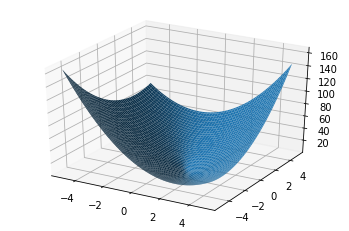

In [16]:
x1,x2,zs = paraboloid(Q,b,c)

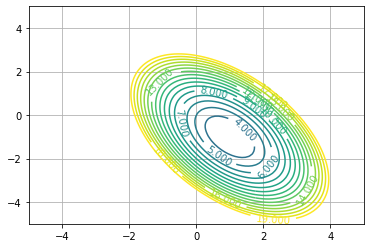

In [17]:
#Prepare contour plot 
def plot_contour(x1,x2,zs,steps=None):
  fig2 = plt.figure()
  levels = list(map(float,[i for i in range(-5,20,1)]))
  cp = plt.contour(x1,x2,zs,levels)
  plt.clabel(cp,inline=1,fontsize=10)
  plt.grid(True)
  if steps != None:
    steps = np.matrix(steps)
    plt.plot(steps[:,0],steps[:,1],'-')
  fig2.show()

plot_contour(x1,x2,zs)

In [18]:
# Use the gradient descent method 
# Since the minimum seems to be located at (1,-1) 
# Choose a guess that is further to show the optimization process
initial_guess = np.matrix([[-9],[9]])
x = initial_guess

i = 0 
imax = 500
eps = 10**(-6)
alpha = 0.05 
# I reverse the sign of r here 
r = Q*initial_guess - b
delta = r.T*r
steps = []

while i<imax and delta>eps:
  x = x - alpha*r      # Here become minus 
  steps.append((x[0,0],x[1,0])) #　Store the steps of each steps 
  r = Q*x - b
  delta = r.T * r
  i +=1

a = i 
#print(steps[-1])

No of iterations: 110


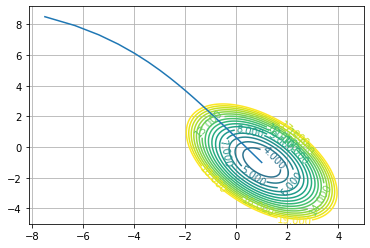

In [19]:
# Plot the trace of the gradient descent method
plot_contour(x1,x2,zs,steps)
print("No of iterations: " + str(a))

In [20]:
# Steepest descent method

initial_guess = np.matrix([[-9],[9]])
x = initial_guess
i = 0 
imax = 500
eps = 10**(-6)
alpha = 0.05 
# I reverse the sign of r here 
r = Q*initial_guess - b
delta = r.T*r
steps_sdm = []

while i< imax and delta>eps**2:
    alpha = float(delta/float(r.T * (Q * r)))
    x = x - alpha*r
    steps_sdm.append((x[0,0],x[1,0]))
    r =Q * x - b
    delta = r.T * r
    i +=1
b = i 

No of iterations: 30
Steepest descent method has a lower number of iterations:  True


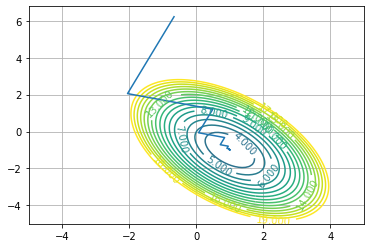

In [21]:
# Plot the trace of the steepest descent method
plot_contour(x1,x2,zs,steps_sdm)
print("No of iterations: " + str(b))
print("Steepest descent method has a lower number of iterations: " , str(bool(b<a)))

From the number of iterations, we can see that steepest descent method is more efficient. 

## Q2

For the first part of question 2, please take a look of my attached pdf. 

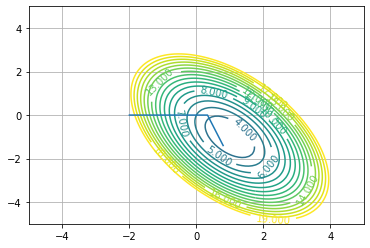

In [32]:
Q = np.matrix([[3,1],[1,2]])
b = np.matrix([[1],[-2]])
c = 0 

x = np.matrix([[-2.],[0.]])
steps_con = []
steps_con.append((x[0,0],x[1,0])) 

i = 0
imax = 3
eps = 0.001
r = b - Q * x
p = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps:
    alpha = float(deltanew / float(p.T * (Q * p)))
    x = x + alpha * p
    steps_con.append((x[0,0],x[1,0]))
    r = r - alpha * (Q * p)
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    p = r + beta * p
    i += 1

plot_contour(x1,x2,zs,steps_con)  